In [134]:
import dgl
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'plotly'

**ATTENTION**: DGLGraph nodes are a consecutive range of integers between 0 and number_of_nodes()

In [17]:
u = torch.tensor([0,1,2,3,4])
v = torch.tensor([7,2,3,4,7])

In [18]:
star1 = dgl.DGLGraph((u, v))

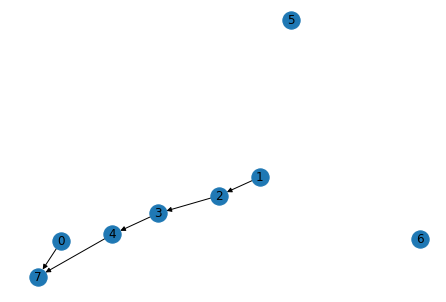

In [19]:
nx.draw(star1.to_networkx(), with_labels=True)

**Assigning a feature**

In [20]:
star1.ndata['x'] = torch.randn(star1.number_of_nodes(), 3)

In [25]:
star1.edata['x'] = torch.randn(star1.number_of_edges(),3)

In [23]:
star1.number_of_edges()

5

In [26]:
star1.add_edges([0], [7])

In [27]:
star1.number_of_edges()

6

In [33]:
star1.edges

**Batching**

In [ ]:
def collate(samples):
    # The input `samples` is a list of pairs
    #  (graph, label).
    graphs, labels = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs)
    return batched_graph, torch.tensor(labels)

**Load Data**

Unit test on subgraph， sampler

In [40]:
test_g = dgl.DGLGraph()
test_g.add_nodes(6)
test_g.add_edges(np.array([0,0,0,0,1,2,2,3]),np.array([1,2,3,5,3,4,5,5]))

In [42]:
test_g.nodes()

tensor([0, 1, 2, 3, 4, 5])

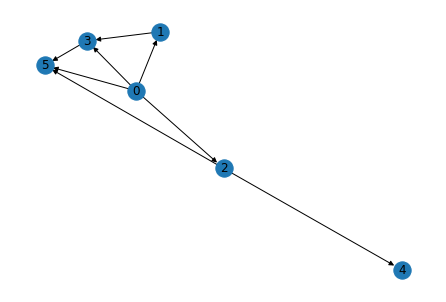

In [48]:
nx.draw(test_g.to_networkx(), with_labels=True)

subgraph

In [43]:
SG = test_g.subgraphs([[0,1], [1,2],[2,3]])

In [45]:
SG[0]

DGLGraph(num_nodes=2, num_edges=1,
         ndata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)}
         edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)})

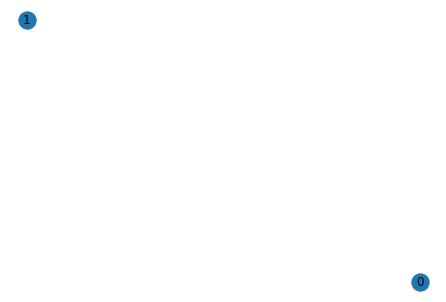

In [49]:
nx.draw(SG[2].to_networkx(), with_labels=True)

sampling

In [81]:
test_g.readonly()
hop1neigh = dgl.contrib.sampling.sampler.NeighborSampler(test_g, 4, expand_factor=5, num_hops=1, seed_nodes = torch.from_numpy(np.array([0,1,3,5])))

In [82]:
for nf in hop1neigh:
    print(nf.block_eid(0))

tensor([0, 1, 2, 3, 4, 5])


In [85]:
from dgl.data import citation_graph as citegrh
data = citegrh.load_cora()
cora = DGLGraph(data.graph)
cora.readonly()

In [129]:
cora_nx = cora.to_networkx().to_undirected()
cc = nx.connected_components(cora_nx)
cora_sub = next(cc) # largest connected components

In [131]:
SG_cora = cora.subgraph(list(cora_sub)[:200])

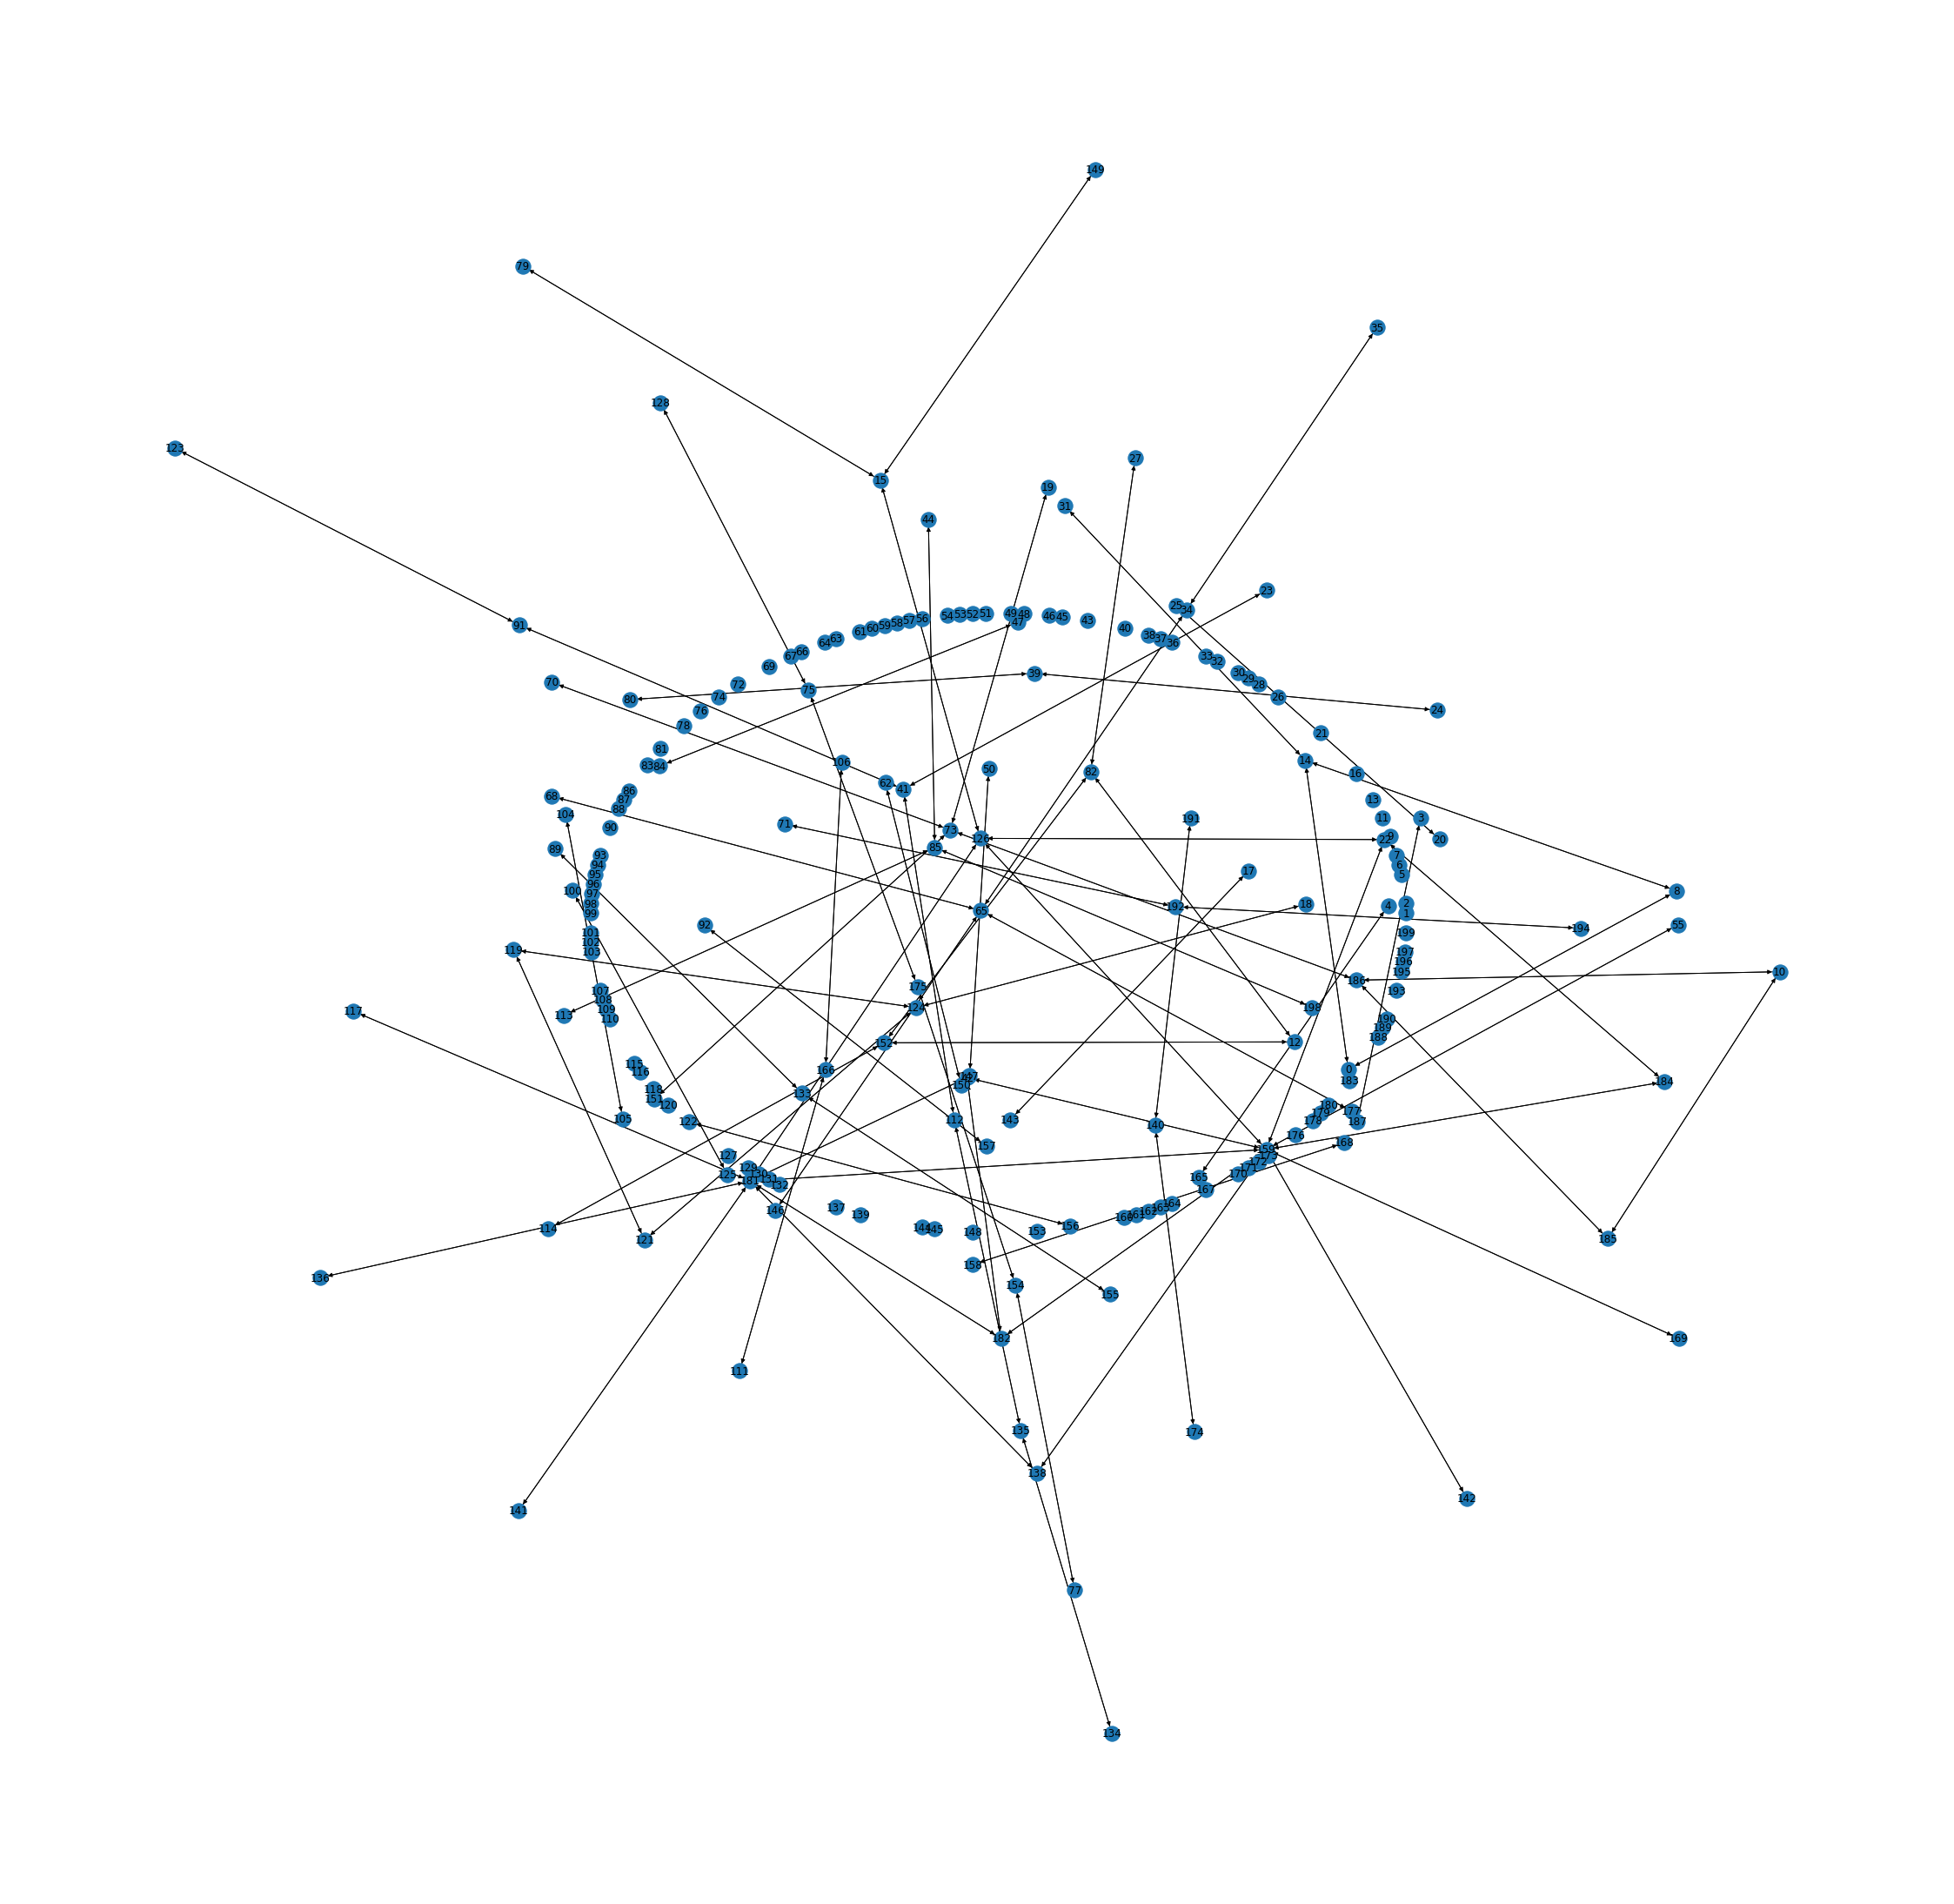

In [136]:
fig, ax = plt.subplots(figsize=(40,40))
pos = nx.kamada_kawai_layout(SG_cora.to_networkx())
nx.draw(SG_cora.to_networkx(), with_labels=True, ax=ax, pos=pos)

In [161]:
seed_nodes = torch.from_numpy(np.array([41, 159, 181, 124]))
hop1neigh = dgl.contrib.sampling.sampler.NeighborSampler(SG_cora, 1, expand_factor=15, num_hops=1, seed_nodes = seed_nodes)

In [162]:
for nf in hop1neigh:
    print('node id: ', nf.layer_parent_nid(0))
    print('edge id: ', nf.block_parent_eid(0))

node id:  tensor([ 23,  91, 112])
edge id:  tensor([23, 68, 76])
node id:  tensor([ 22,  42,  55, 126, 138, 142, 169, 181, 182, 184])
edge id:  tensor([ 21,  36,  42,  93, 102, 107, 137, 148, 151, 154])
node id:  tensor([ 42, 117, 126, 136, 138, 141, 159, 182])
edge id:  tensor([ 37,  80,  94, 101, 103, 106, 130, 152])
node id:  tensor([ 18, 119, 121])
edge id:  tensor([17, 82, 84])


In [165]:
SG_cora_nx = SG_cora.to_networkx()
print([list(SG_cora_nx.neighbors(n)) for n in seed_nodes.numpy()])

[[23, 91, 112], [22, 42, 55, 126, 138, 142, 169, 181, 182, 184], [42, 117, 126, 136, 138, 141, 159, 182], [18, 119, 121]]


In [166]:
hop1neigh = dgl.contrib.sampling.sampler.NeighborSampler(SG_cora, 2, expand_factor=15, num_hops=1, seed_nodes = seed_nodes)

In [167]:
for nf in hop1neigh:
    print(nf.block_parent_eid(0))

tensor([ 23,  68,  76,  21,  36,  42,  93, 102, 107, 137, 148, 151, 154])
tensor([ 37,  80,  94, 101, 103, 106, 130, 152,  17,  82,  84])


In [156]:
SG_cora.find_edges(23)

(tensor([23]), tensor([41]))

In [180]:
seed_nodes = torch.from_numpy(np.array([159, 42, 181]))
hop1neigh = dgl.contrib.sampling.sampler.NeighborSampler(SG_cora, 3, expand_factor=15, num_hops=1, seed_nodes = seed_nodes)

In [181]:
for nf in hop1neigh:
    print('node id: ', nf.layer_parent_nid(0))
    print('edge id: ', nf.block_parent_eid(0))

node id:  tensor([ 22,  42,  55, 117, 126, 136, 138, 141, 142, 159, 169, 181, 182, 184])
edge id:  tensor([ 21,  36,  42,  93, 102, 107, 137, 148, 151, 154, 124, 142, 150,  37,
         80,  94, 101, 103, 106, 130, 152])


In [182]:
SG_cora_nx = SG_cora.to_networkx()
print([list(SG_cora_nx.neighbors(n)) for n in seed_nodes.numpy()])

[[22, 42, 55, 126, 138, 142, 169, 181, 182, 184], [159, 181, 182], [42, 117, 126, 136, 138, 141, 159, 182]]
